# Deep Learning - Generative Adversarial Networks

In [1]:
! pip install tensorflow==2.0

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Reshape, Input
from tensorflow.keras import Model, Sequential

import numpy as np
np.random.seed(0)
import matplotlib
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In this exercise we will build a GAN using the MNIST dataset. If everything goes well and you're able to train the GAN correctly, you should be able to generate handwritten digits that never existed before.

In [0]:
img_shape = x_train[0].shape
latent_dim = 100 # This is the dimension of the random noise we'll use for the generator
batch_size = 128
epochs = 1000

In [6]:
# Create generator_layers which are the layers for the generator model
# The generator model should have 3 dense layers of 256, 512, and 1024 units respectively
# After each Dense layer apply a BatchNormalization with a momentum value between 0.7 and 0.9
# Finalize the layers with a final output layer followed by a Reshape layer to get it to the right size

# Think about what the input to the generator is and what the output should be

# YOUR CODE HERE
generator_layers=[Dense(256, input_dim=latent_dim),
                  BatchNormalization(momentum=.7),
                  Dense(512),
                  BatchNormalization(momentum=.8),
                  Dense(1024),
                  BatchNormalization(momentum=.9),
                  Dense(784),
                  Reshape(img_shape)]


generator = Sequential(generator_layers)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               25856     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               8

In [0]:
assert generator
assert len(generator_layers) == 8
assert isinstance(generator_layers[0], Dense)
assert isinstance(generator_layers[2], Dense)
assert isinstance(generator_layers[4], Dense)
assert isinstance(generator_layers[6], Dense)
assert isinstance(generator_layers[1], BatchNormalization)
assert isinstance(generator_layers[3], BatchNormalization)
assert isinstance(generator_layers[5], BatchNormalization)

In [14]:
# Create discriminator_layers which are the layers for the discriminator model
# The discriminator model should have 2 Dense layers with 512, 256 units respectively
# Add the appropriate output layer and activation function

# Think about what the input and output for a discriminator model would be

# YOUR CODE HERE
discriminator_layers=[Flatten(input_shape=img_shape),
                      Dense(512),
                      Dense(256),
                      Dense(1, activation="softmax")]

discriminator = Sequential(discriminator_layers)
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
assert discriminator
assert len(discriminator_layers) == 4

Training GANs is a bit more complex than other networks so the below code is provided for you as is. You may reuse this code for your own edification but are not expected to have figured it out on your own.

You are also likely to not be able to get good results in the time allocated for this exercise. However, you should easily be able to see examples of mode collapse.

In [0]:
discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer="adam")

In [0]:
# Rescale -1 to 1
x_train = x_train / 127.5 - 1.
# x_train = np.expand_dims(x_train, axis=3)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

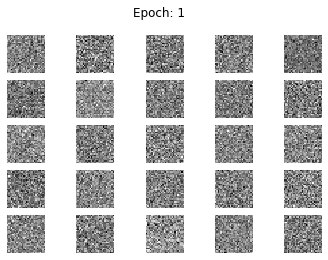

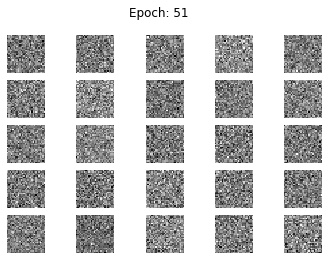

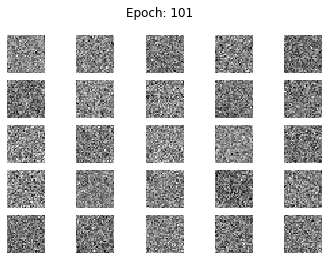

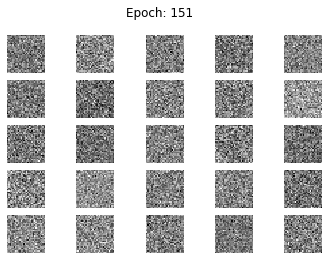

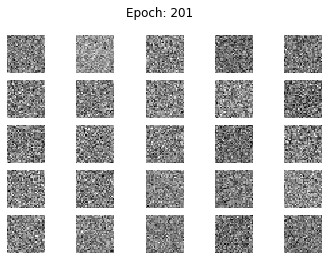

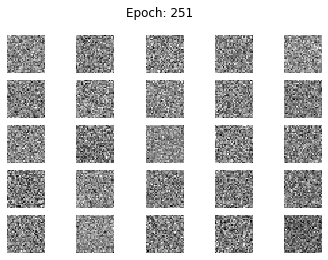

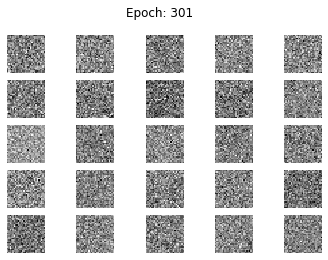

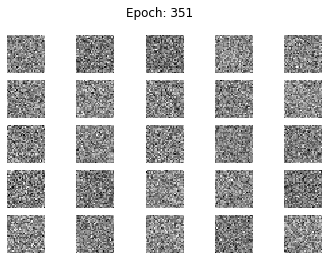

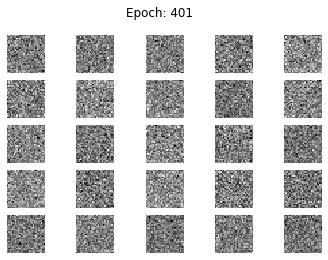

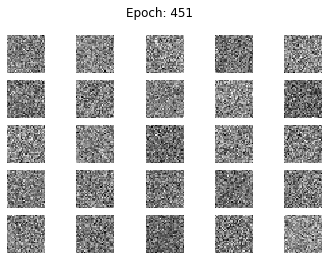

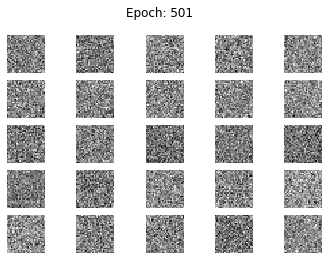

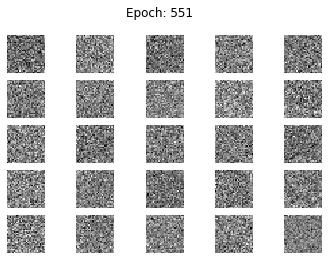

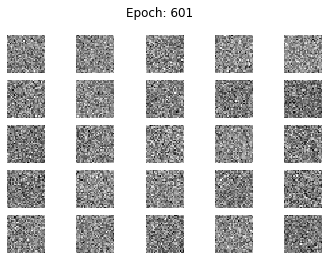

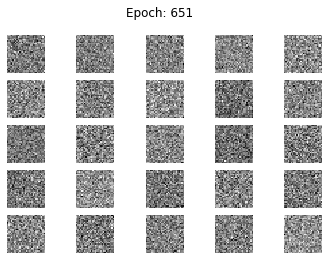

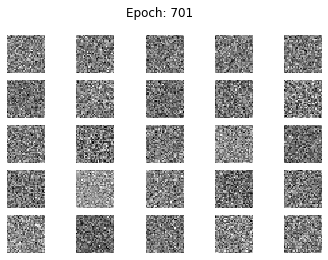

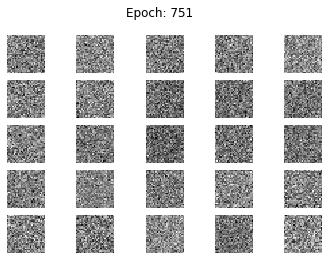

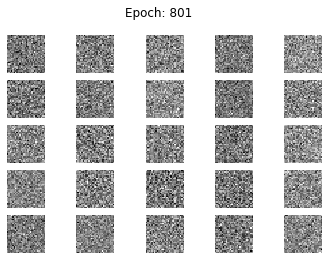

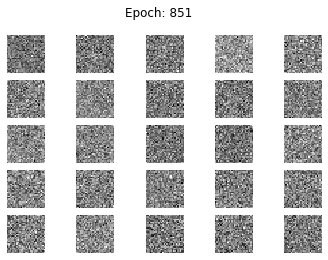

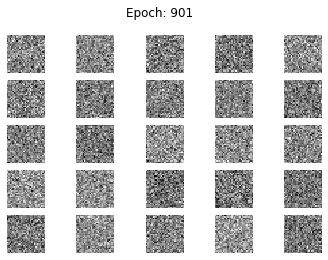

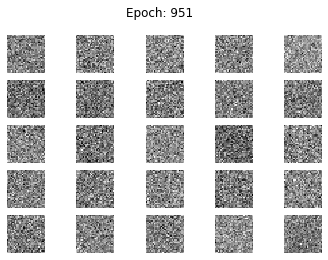

In [18]:
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    discriminator.trainable = False
    g_loss = combined.train_on_batch(noise, valid)
    
    if epoch % 50 == 0:
        r, c = 5,5
        noise = np.random.normal(0, 1, (r*c, latent_dim))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.suptitle(f"Epoch: {epoch+1}")
        plt.show()

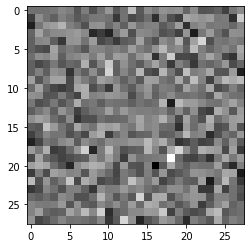

In [19]:
# Generate another "digit"
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)[0]
plt.imshow(gen_img, cmap='gray')
plt.show()

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "This is cool. I want to do more!"